# Deep learning with Neural Networks

This notebook contains implementation of a L layered Neural network in python to solve a binary classification problem. The dataset used is available [here](https://www.kaggle.com/mriganksingh/cat-images-dataset).

Model is trained to identify cat vs non cat images.

### Library Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline
np.random.seed(1)

Loading the dataset

In [2]:
def loadh5(path, col0, col1):
    dataset = h5py.File(path, "r")
    X = np.array(dataset[col0][:]) 
    y = np.array(dataset[col1][:])
    return X, y


X_train, y_train = loadh5('train_catvnoncat.h5', "train_set_x", "train_set_y")
X_test, y_test = loadh5('test_catvnoncat.h5', "test_set_x", "test_set_y")

Dataset image samples

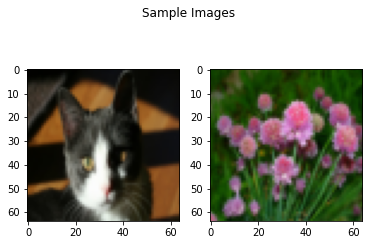

In [3]:
index1=19
index2=21

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Sample Images')
ax1.imshow(X_train[index1])
ax2.imshow(X_train[index2])
plt.show()

### Dataset Preprocessing

Reshaping and normalizing the dataset for the NN

In [4]:
X_train = X_train.reshape((X_train.shape[0], -1)).T
X_test = X_test.reshape((X_test.shape[0], -1)).T
y_train = y_train.reshape((1, y_train.shape[0]))
y_test = y_test.reshape((1, y_test.shape[0]))

# Normalizing
X_train = X_train/255.
X_test = X_test/255.

In [5]:
print ("Number of training examples: m_train = ", X_train.shape[0])
print ("Number of testing examples: m_test = ", X_test.shape[0])

Number of training examples: m_train =  12288
Number of testing examples: m_test =  12288


We'll refer X_train and y_train as X and Y from now.

In [6]:
X = X_train
Y = y_train

Defining sigmoid and relu activation functions for the NN to be used in the forward propagation. relu_backward and sigmoid_backward functions compute the activation function slope during backpropagation.

In [7]:
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    return A

def relu(Z):
    A = np.maximum(0,Z)
    return A

def relu_backward(dA, Z):
    dZ = np.array(dA, copy=True) 
    dZ[Z <= 0] = 0
    return dZ

def sigmoid_backward(dA, Z):
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    return dZ

### Initializations and Parameter Definitions

#### Hyperparameters
* **layer_dims** - Each element corresponds to the size of the i<sup>th</sup> layer in the Neural Network. First element is the size of the input layer. Last element is the size of the output layer. All the elements in between correspond to respective hidden layer sizes.
* **learning_rate** - the rate which controls the degree of change to parameters weights and biases after backprop.
* **num_iterations** - number of gradient descent iterations the NN takes. Each iteration contains a forward propagation step, cost computation, a backward propagation step and then updating the parameters.

#### Parameters
* **costs** - stores the cost obtained at each iteration.
* **weights** - dictionary storing weights **(W)** for each layer.
* **biases** - dictionary storing bias values **(b)** for each layer.
* **activation** - dictionary storing activation outputs **(A)** for each layer.
* **non_activated_Z** - dictionary storing the layer output (non activated) **(Z)** for each layer.
* **weight_gradient** - dictionary storing the slope obtained for weight **(dW)**.
* **bias_gradient** - dictionary storing the slope obtained for biases **(db)**.
* **activation_gradient** - dictionary storing the slope obtained for layer activations **(dA)**.

Note: variable nomenclature is similar to Andrew NG's neural networks and deep learning course, the equations and the structure is inspired from the same.


#### Activations

Architecture is as follows:
L-1 layers of activation with RELU and the final Lth layer has an activation of Sigmoid.

In [8]:
layer_dims = [12288, 20, 7, 5, 1] #  4-layer model
learning_rate = 0.0075
num_iterations = 2500

costs = []
weights = dict()
biases = dict()
activation = dict()
non_activated_Z = dict()
weight_gradient = dict()
bias_gradient = dict()
activation_gradient = dict()

# Parameters initialization. 
parameters = {}
L = len(layer_dims)            # number of layers in the network

for l in range(1, L):
    weights[l] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
    biases[l] = np.zeros((layer_dims[l], 1))

Following is the vectorized code for Neural network implementation. Cost is shown for every 100th gradient descent step and a graph is plooted of the same

Cost after iteration  0 : 0.7717493284237686
Cost after iteration  100 : 0.6720534400822914
Cost after iteration  200 : 0.6482632048575212
Cost after iteration  300 : 0.6115068816101354
Cost after iteration  400 : 0.5670473268366111
Cost after iteration  500 : 0.5401376634547801
Cost after iteration  600 : 0.5279299569455267
Cost after iteration  700 : 0.4654773771766851
Cost after iteration  800 : 0.36912585249592794
Cost after iteration  900 : 0.39174697434805344
Cost after iteration  1000 : 0.31518698886006163
Cost after iteration  1100 : 0.2726998441789385
Cost after iteration  1200 : 0.23741853400268137
Cost after iteration  1300 : 0.19960120532208647
Cost after iteration  1400 : 0.18926300388463305
Cost after iteration  1500 : 0.16118854665827748
Cost after iteration  1600 : 0.14821389662363316
Cost after iteration  1700 : 0.13777487812972944
Cost after iteration  1800 : 0.1297401754919012
Cost after iteration  1900 : 0.12122535068005212
Cost after iteration  2000 : 0.11382060668

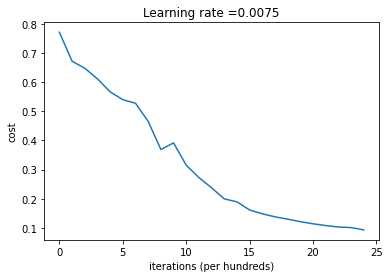

In [9]:
# Loop (gradient descent)
for i in range(0, num_iterations):

    # FORWARD PROPAGATION
    #####################################################################################
    
    # [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
    A = X
    L = len(weights)                   # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        Z = weights[l].dot(A_prev) + biases[l]
        activation[l-1]=A
        non_activated_Z[l]=Z
        A = relu(Z)
    
    activation[l]=A
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    Z = weights[L].dot(A) + biases[L]
    non_activated_Z[L]=Z
    AL = sigmoid(Z)
    activation[L] = AL
    
    #####################################################################################
    
    # COST COMPUTATION
    #####################################################################################

    m = Y.shape[1]
    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    cost = np.squeeze(cost)

    #####################################################################################
    
    # Backward propagation.
    #####################################################################################
    
    grads = {}
    L = len(weights) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    dZ = sigmoid_backward(dAL, non_activated_Z[L])
    W, b = weights[L], biases[L]
    A_prev = activation[L-1]
    m = A_prev.shape[1]
    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    activation_gradient[L-1], weight_gradient[L], bias_gradient[L] = dA_prev, dW, db
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        dZ = relu_backward(activation_gradient[l+1], non_activated_Z[l+1])
        W, b = weights[l+1], biases[l+1]
        A_prev = activation[l]
        m = A_prev.shape[1]
        dW = 1./m * np.dot(dZ,A_prev.T)
        db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
        dA_prev = np.dot(W.T,dZ)
        dA_prev_temp, dW_temp, db_temp = dA_prev, dW, db
        
        activation_gradient[l], weight_gradient[l+1], bias_gradient[l+1] = dA_prev_temp, dW_temp, db_temp
 
    #####################################################################################

    # Update parameters.
    #####################################################################################
    for l in range(L):
        weights[l+1] = weights[l+1] - learning_rate * weight_gradient[l+1]
        biases[l+1] = biases[l+1] - learning_rate * bias_gradient[l+1]

    #####################################################################################
            
    # Print the cost every 100 training example
    if i % 100 == 0:
        print ("Cost after iteration ",i,':', cost)
        costs.append(cost)
        
# plot the cost
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

Predicting the outputs with a single forward propagation pass with the parameters learned

In [10]:
def predict(X, y):
    m = X.shape[1]
    n = len(weights)  # number of layers in the neural network
    p = np.zeros((1,m))

    # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
    A = X
    L = len(weights)                   # number of layers in the neural network

    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        Z = weights[l].dot(A_prev) + biases[l]
        A = relu(Z)

    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    Z = weights[L].dot(A) + biases[L]
    AL = sigmoid(Z)

    # convert probas to 0/1 predictions
    for i in range(0, AL.shape[1]):
        if AL[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    print("Accuracy: ", (np.sum((p == y)/m))*100)

Predicting on the Training and the testing data.

In [11]:
predict(X_train,y_train)
predict(X_test, y_test)

Accuracy:  98.5645933014354
Accuracy:  80.0


Training accuracy of 98.5% and Testing accuracy of 80% is achieved.